### Customer Churn Prediction

#### Import Necessary Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the dataset

In [2]:
data=pd.read_csv("/content/churn_data.csv")
print(data.head(3))

   CustomerID        Name  Age  Gender     Location  \
0           1  Customer_1   63    Male  Los Angeles   
1           2  Customer_2   62  Female     New York   
2           3  Customer_3   24  Female  Los Angeles   

   Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  
0                          17         73.36             236      0  
1                           1         48.76             172      0  
2                           5         85.47             460      0  


### Feature Engineering

##### 1.Average Monthly Usage of GB

In [3]:
data=data.assign(average_monthly_usage = lambda x: data["Total_Usage_GB"]/data["Subscription_Length_Months"])

##### 2.Total Bill Amount

In [4]:
data=data.assign(Total_Bill= lambda x: data["Monthly_Bill"]*data["Subscription_Length_Months"])

##### 3.Age Group Bin

In [5]:
# Define the age groups and corresponding values
age_conditions = [
    (data['Age'] >= 18) & (data['Age'] <= 24),
    (data['Age'] >= 25) & (data['Age'] <= 34),
    (data['Age'] >= 35) & (data['Age'] <= 44),
    (data['Age'] >= 45) & (data['Age'] <= 54),
    (data['Age']>55)
]

# Define the values to assign to each age group
age_values = [1, 2, 3, 4, 0]
data['Age_Group'] = np.select(age_conditions, age_values, default=0)

# Display the DataFrame with the new 'Age_Group' column
print(data.head(3))


   CustomerID        Name  Age  Gender     Location  \
0           1  Customer_1   63    Male  Los Angeles   
1           2  Customer_2   62  Female     New York   
2           3  Customer_3   24  Female  Los Angeles   

   Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  \
0                          17         73.36             236      0   
1                           1         48.76             172      0   
2                           5         85.47             460      0   

   average_monthly_usage  Total_Bill  Age_Group  
0              13.882353     1247.12          0  
1             172.000000       48.76          0  
2              92.000000      427.35          1  


#### EDA on the data

##### Check for null values

In [6]:
print(data.isnull().sum())
#Conclusion:
""" There is no missing value in the dataset"""

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
average_monthly_usage         0
Total_Bill                    0
Age_Group                     0
dtype: int64


' There is no missing value in the dataset'

In [7]:
print(data.describe())

          CustomerID            Age  Subscription_Length_Months  \
count  100000.000000  100000.000000               100000.000000   
mean    50000.500000      44.027020                   12.490100   
std     28867.657797      15.280283                    6.926461   
min         1.000000      18.000000                    1.000000   
25%     25000.750000      31.000000                    6.000000   
50%     50000.500000      44.000000                   12.000000   
75%     75000.250000      57.000000                   19.000000   
max    100000.000000      70.000000                   24.000000   

        Monthly_Bill  Total_Usage_GB          Churn  average_monthly_usage  \
count  100000.000000   100000.000000  100000.000000          100000.000000   
mean       65.053197      274.393650       0.497790              43.349682   
std        20.230696      130.463063       0.499998              65.786483   
min        30.000000       50.000000       0.000000               2.083333   
25%   

In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
 9   average_monthly_usage       100000 non-null  float64
 10  Total_Bill                  100000 non-null  float64
 11  Age_Group                   100000 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 9.2+ MB
None


#### Drop UnNecessary Feature

In [9]:
df=data.drop(['CustomerID','Name'],axis=1)
print(df.head(3))

   Age  Gender     Location  Subscription_Length_Months  Monthly_Bill  \
0   63    Male  Los Angeles                          17         73.36   
1   62  Female     New York                           1         48.76   
2   24  Female  Los Angeles                           5         85.47   

   Total_Usage_GB  Churn  average_monthly_usage  Total_Bill  Age_Group  
0             236      0              13.882353     1247.12          0  
1             172      0             172.000000       48.76          0  
2             460      0              92.000000      427.35          1  


In [10]:
#Get the cateogrical and numerical value from the dataset
categorical=df.select_dtypes(include=['object']).columns
numerical=df.select_dtypes(exclude=['object']).columns
print("Categorical variable:",categorical)
print("Numerical variable",numerical)
#Conclusion
""" Churn and Age_Group is a categorical Variable but due to it's data type it is present as numerical variable"""

Categorical variable: Index(['Gender', 'Location'], dtype='object')
Numerical variable Index(['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn', 'average_monthly_usage', 'Total_Bill', 'Age_Group'],
      dtype='object')


" Churn and Age_Group is a categorical Variable but due to it's data type it is present as numerical variable"

##### Identify the unique values in the categorical feature

In [11]:
for i in categorical:
    print(i)
    print(data[i].unique())

Gender
['Male' 'Female']
Location
['Los Angeles' 'New York' 'Miami' 'Chicago' 'Houston']


##### Data Visualization

In [12]:
df['Churn_label'] = df['Churn'].map({0: 'not_Churned', 1: 'Churned'})

' There is no class imbalance in the data, therefore no need to resample the data and \nthere is no specific need to use Random Forest algorthims to address the imbalance'

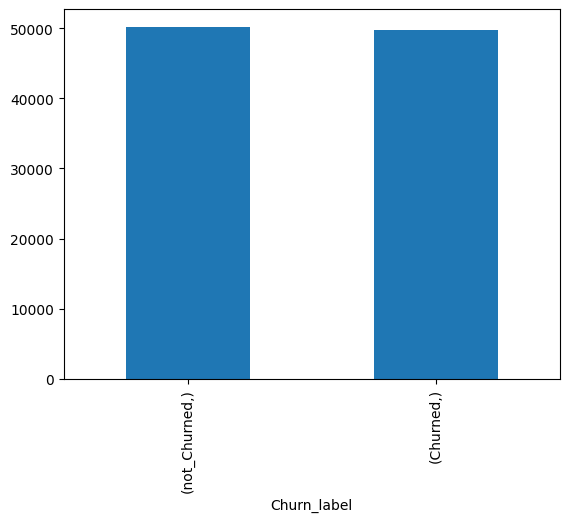

In [13]:
df[["Churn_label"]].value_counts().plot(kind="bar")
#Conclusion:
""" There is no class imbalance in the data, therefore no need to resample the data and
there is no specific need to use Random Forest algorthims to address the imbalance"""

##### Visualization of numerical variable VS class

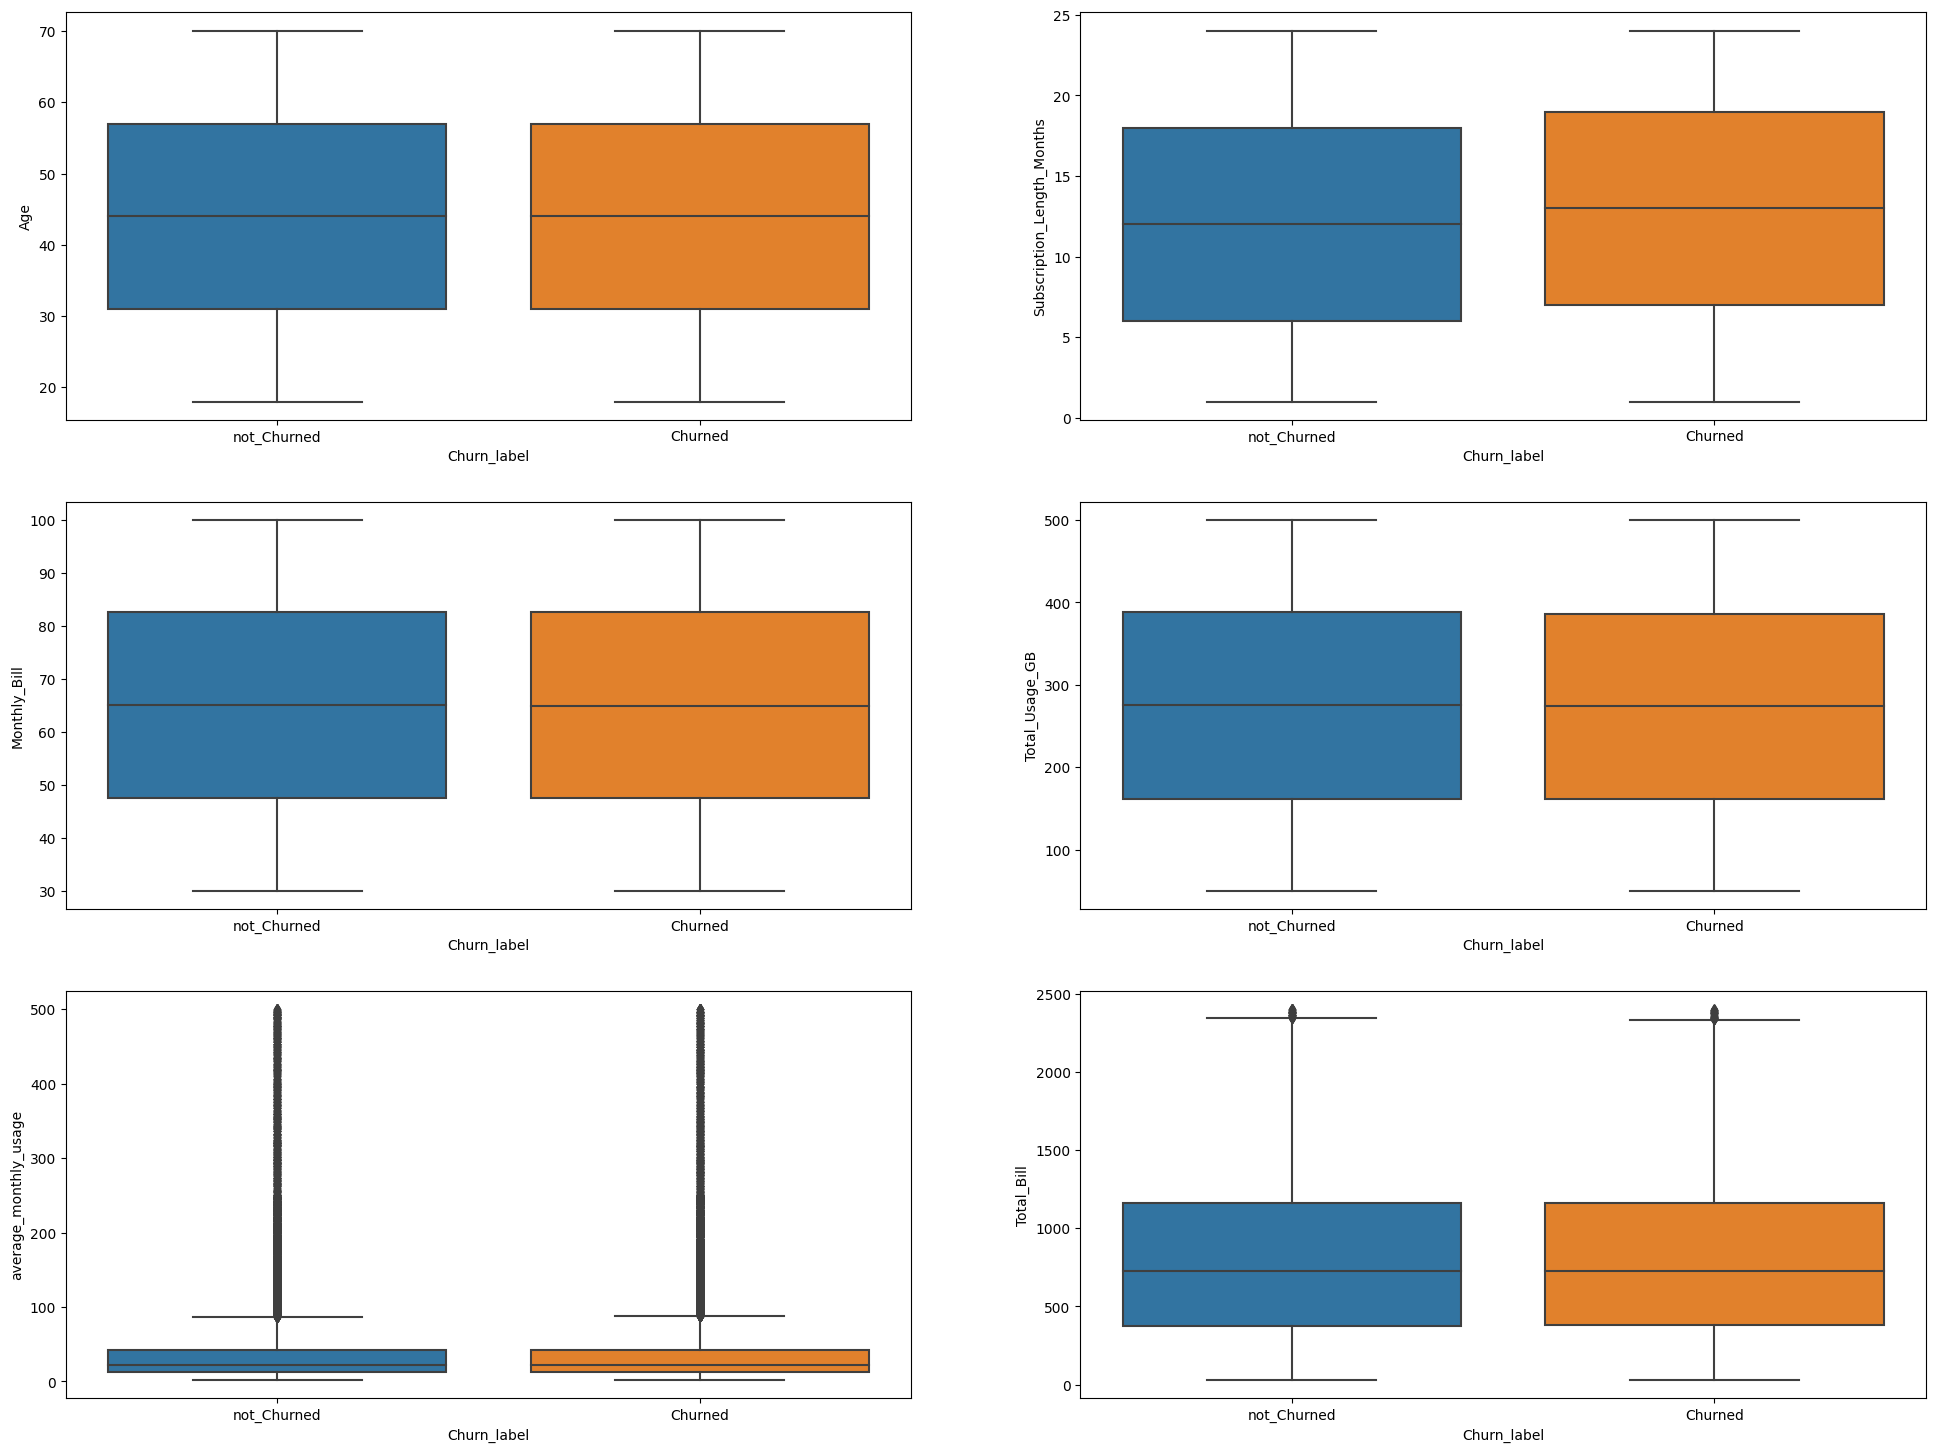

In [14]:
#To remove the categorical variable in numerical format
feature=[ x for x in numerical if x not in ["Churn","Age_Group"]]

#Plot
fig,axes=plt.subplots(3,2,figsize=(24,18))
axes=axes.flatten()
for i in range(len(feature)):
    sns.boxplot(x="Churn_label",y=feature[i],data=df,ax=axes[i])

#### HeatMap

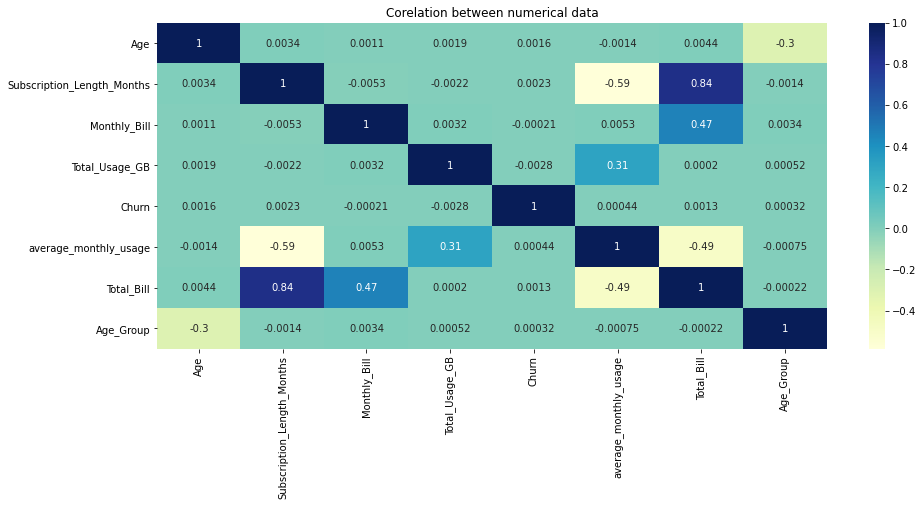

' Having High multicollinearity can make it difficult for a model to distinguish the individual effects of correlated features.\nTHEREFORE LOW CORELATION IS GOOD FOR THE MODEL'

In [ ]:
def heatmap(df,title):
    plt.figure(figsize=(15,6))
    #sns.set(font_scale=1)
    sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
    plt.title(title)
    plt.show()
    return

heatmap(data[numerical],"Corelation between numerical data")

#Conclusion:
"""There is Low corelation between features which suggests that there is little multicollinearity(corelation between independent variable)."""

""" Having High multicollinearity can make it difficult for a model to distinguish the individual effects of correlated features.
THEREFORE LOW CORELATION IS GOOD FOR THE MODEL"""

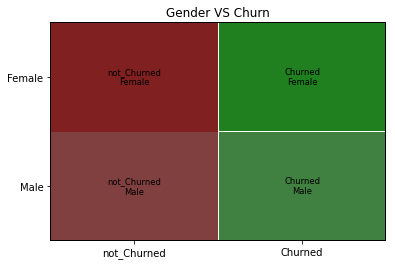

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(df,['Churn_label',"Gender"],title='Gender VS Churn')
plt.show()

In [15]:
# Remove the Churn_label from the dataframe
df=df.drop(["Churn_label"],axis=1)

#### Import Necessary Library Need for Model Building

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,r2_score
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn import metrics

### Data Preprocessing

In [17]:
df.columns

Index(['Age', 'Gender', 'Location', 'Subscription_Length_Months',
       'Monthly_Bill', 'Total_Usage_GB', 'Churn', 'average_monthly_usage',
       'Total_Bill', 'Age_Group'],
      dtype='object')

##### Label Encoding The Categorical Variable

In [18]:
feature=list(categorical)
le=LabelEncoder()
for i in feature:
    df[i]=le.fit_transform(df[i])
print(df.head(2))

   Age  Gender  Location  Subscription_Length_Months  Monthly_Bill  \
0   63       1         2                          17         73.36   
1   62       0         4                           1         48.76   

   Total_Usage_GB  Churn  average_monthly_usage  Total_Bill  Age_Group  
0             236      0              13.882353     1247.12          0  
1             172      0             172.000000       48.76          0  


##### Split the Dataset Independent and Dependent Variable

In [57]:
#Dependent Variable
y=df.iloc[0:40000,-4]
#indpendent Variable
x=df.drop(['Churn'],axis=1)
x=x.iloc[0:40000,:]


##### split the Dataset into Train/Test

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(24000, 9)
(24000,)
(16000, 9)
(16000,)


##### Standardization of the feature

In [59]:
sc=StandardScaler()
x_train=pd.DataFrame(sc.fit_transform(x_train),columns=x.columns)
x_test=pd.DataFrame(sc.fit_transform(x_test),columns=x.columns)

#### Basic model cross validation

In [33]:
models = []
models.append(('Random Forest Clas.', RF()))
models.append(('KNN', KNN()))
models.append(('Decision Tree Clas.', DT()))
models.append(('Logistic Reg.', LogisticRegression()))

model_name=[]
scores=[]
for name,model in models:
    score=cross_val_score(model,x_train,y_train,cv=10,scoring="accuracy")
    scores.append(score)
    model_name.append(model)
    print(f"Mean of the {name} model scores : {score.mean()}")

Mean of the Random Forest Clas. model scores : 0.5015416666666667
Mean of the KNN model scores : 0.49991666666666673
Mean of the Decision Tree Clas. model scores : 0.4989166666666667
Mean of the Logistic Reg. model scores : 0.4972083333333333


### Model training

#### Random Forest

In [34]:
#Model building for all the feature
model=RF()
model.fit(x_train,y_train)
y_pred_test=model.predict(x_test)
y_pred_train=model.predict(x_train)
test_acc=accuracy_score(y_pred_test,y_test)
train_acc=accuracy_score(y_pred_train,y_train)
print(f"RF Classifier train accuracy:{train_acc}")
print(f"RF Classifier test accuracy:{test_acc}")
#Conclusion:
""" The model is overfitting. Therefore it is not a good model"""

RF Classifier train accuracy:1.0
RF Classifier test accuracy:0.496


' The model is overfitting. Therefore it is not a good model'

##### Model Fine Tuning

##### Feature Importance for random forest

Text(0.5, 0, 'Feature Importance by Random Forest Classifier')

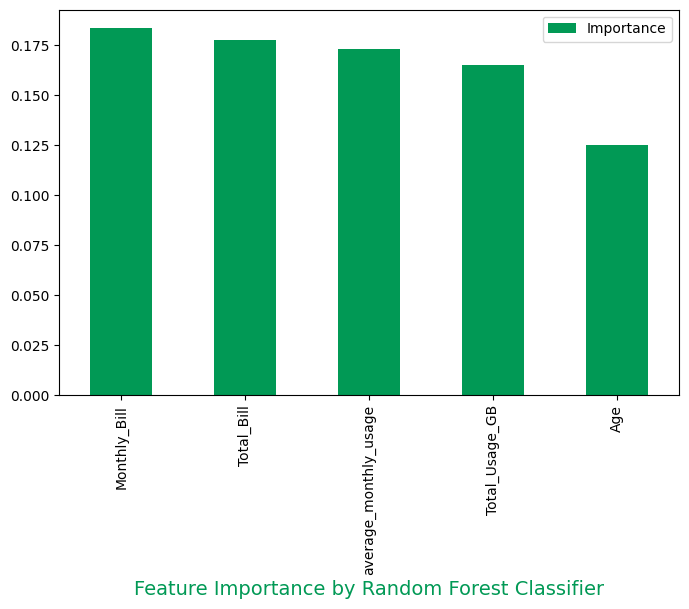

In [35]:
feature_importance_ = pd.DataFrame({'Importance' : RF().fit(x_train, y_train).feature_importances_}, index = x.columns)

feature_importance_.sort_values(by = 'Importance', ascending = False, axis = 0)[:5].plot(kind = 'bar', color = '#019955', figsize = (8, 5))
plt.xlabel("Feature Importance by Random Forest Classifier", color = "#019955", fontdict= {"fontsize" : 14})

Feature Importance Training

In [78]:
df_importance=df[['Monthly_Bill','Total_Bill','Total_Usage_GB', 'Age',"average_monthly_usage"]]
#Reduce sample size
df_importance=df_importance.iloc[0:40000,:]
print(df_importance)
#Split the dataset input train/test
x_train,x_test,y_train,y_test=train_test_split(df_importance,y,test_size=0.4,random_state=2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

       Monthly_Bill  Total_Bill  Total_Usage_GB  Age  average_monthly_usage
0             73.36     1247.12             236   63              13.882353
1             48.76       48.76             172   62             172.000000
2             85.47      427.35             460   24              92.000000
3             97.94      293.82             297   36              99.000000
4             58.14     1104.66             266   46              14.000000
...             ...         ...             ...  ...                    ...
39995         36.44      619.48             159   41               9.352941
39996         69.72      557.76              76   46               9.500000
39997         81.99      573.93             185   21              26.428571
39998         83.45      917.95             198   34              18.000000
39999         42.02      882.42             428   38              20.380952

[40000 rows x 5 columns]
(24000, 5)
(24000,)
(16000, 5)
(16000,)


In [79]:
#Standardization of important feature
sc=StandardScaler()
x_train_new=pd.DataFrame(sc.fit_transform(x_train),columns=df_importance.columns)
x_test_new=pd.DataFrame(sc.fit_transform(x_test),columns=df_importance.columns)

In [80]:
# Training the model on identified Feature Importance
model=RF()
model.fit(x_train_new,y_train)
y_pred_test=model.predict(x_test_new)
y_pred_train=model.predict(x_train_new)
test_acc=metrics.accuracy_score(y_pred_test,y_test)
train_acc=metrics.accuracy_score(y_pred_train,y_train)
print(f"RF Classifier train accuracy:{train_acc}")
print(f"RF Classifier test accuracy:{test_acc}")
#Conclusion
"""Feature Selection did not imporove the model performanace, it's still facing OverFitting"""

RF Classifier train accuracy:1.0
RF Classifier test accuracy:0.493625


"Feature Selection did not imporove the model performanace, it's still facing OverFitting"

##### Hyperparameter Tuning using GridsearchCV

In [88]:
params_grid = {'criterion' : ['entropy', 'gini'], 'max_depth' : [2, 4, 6], 'n_estimators' : [300, 400, 500],
              'min_samples_split' : [2, 4, 6], 'min_samples_leaf' : [2, 3, 5]}

grid = GridSearchCV(RF(), params_grid, cv = 3, scoring = 'f1')
grid.fit(x_train, y_train)
print(grid.best_params_)
print(grid.best_score_)
""" Computationaly expensive process,average execution time more than 6 hrs"""

KeyboardInterrupt: ignored

##### Training the model on best parameters

In [ ]:
model=RF(**grid.best_params_)
model.fit(x_train_sc,y_train)
y_pred_test=model.predict(x_test)
y_pred_train=model.predict(x_train)
test_acc=metrics.accuracy_score(y_pred_test,y_test)
train_acc=metrics.accuracy_score(y_pred_train,y_train)
print(f"RF Classifier train accuracy:{train_acc}")
print(f"RF Classifier test accuracy:{test_acc}")

#### Save the model

In [81]:
import pickle
#Save the model
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

In [62]:
#Load the model
with open('model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

#### Model Deployment

In [82]:
x_train_new.columns

Index(['Monthly_Bill', 'Total_Bill', 'Total_Usage_GB', 'Age',
       'average_monthly_usage'],
      dtype='object')

In [65]:
#Get The User Data
feature=['Monthly_Bill', 'Total_Bill', 'Total_Usage_GB', 'Age','average_monthly_usage']
Pred_data=[]
for i in feature:
  z=int(input(f"Enter the {i}:"))
  Pred_data.append(z)
print(Pred_data)


Enter the Monthly_Bill:100
Enter the Total_Bill:300
Enter the Total_Usage_GB:21
Enter the Age:25
Enter the average_monthly_usage:56
[100, 300, 21, 25, 56]


In [84]:
#Transform the data
Pred_reshaped= np.array(Pred_data).reshape(1,-1)
#Standardize the input
input_data=sc.transform(Pred_reshaped)
print(input_data)

[[ 1.73541178 -0.95376852 -1.93976428 -1.2499622   0.17690162]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [87]:
# Make predictions using the loaded model
predicted_class = model.predict(input_data)[0]
Pred_label= "Not Churn" if predicted_class==0 else "Churn"
print(f"Predicted Label: {predicted_class}")
print(Pred_label)

Predicted Label: 0
Not Churn


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Deep Learning Model Approach

#### Import Library

In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping


#### Split the dataset

In [38]:
#Dependent Variable
y=df.iloc[:,-4]
#indpendent Variable
x=df.drop(['Churn'],axis=1)
# Split the train and test dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=2)

#### Model Structure

In [39]:
input_dim = x_train.shape[1]
print(input_dim)

9


In [40]:
# Create a sequential neural network model
model = keras.Sequential([
    layers.Input(shape=(input_dim)),  # Replace 'input_dim' with the number of features
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

#### Compile the model

In [41]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#### Early Stoping To Address Over-Fitting

In [42]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#### Train the model

In [43]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test),callbacks=[early_stopping])


Epoch 1/10
1875/1875 [==============================] - 14s 4ms/step - loss: 3.4284 - accuracy: 0.4988 - val_loss: 0.6931 - val_accuracy: 0.5023
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7004 - accuracy: 0.4972 - val_loss: 0.6931 - val_accuracy: 0.5023
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6955 - accuracy: 0.5024 - val_loss: 0.6932 - val_accuracy: 0.5023
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6946 - accuracy: 0.4983 - val_loss: 0.6931 - val_accuracy: 0.5023
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6940 - accuracy: 0.4992 - val_loss: 0.6931 - val_accuracy: 0.5023
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6945 - accuracy: 0.5020 - val_loss: 0.6932 - val_accuracy: 0.4977
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6939 - accuracy: 0.5009 - val_loss: 0.6932 - val_accuracy

#### Evaluate the model performance

In [44]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
#Conclusion:
"""Deep Learning model failed to increase the accuracy, solution to the issue is to get more generalized data"""

1250/1250 [==============================] - 3s 2ms/step - loss: 0.6931 - accuracy: 0.5023
Test Accuracy: 50.23%


'Deep Learning model failed to increase the accuracy, solution to the issue is to get more generalized data OR\nTo use '

### Final Conclusion

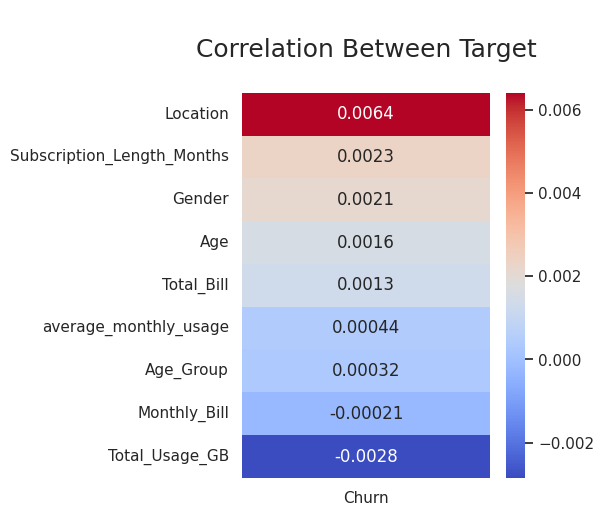

In [46]:
def corr_for_target(data, target, title=None):
    plt.figure(figsize=(4,5))
    sns.set(font_scale=1)

    sns.heatmap(data.corr()[[target]].sort_values(target, ascending=False)[1:], annot=True, cmap="coolwarm")

    if title: plt.title(f"\n{title}\n", fontsize=18)
    return

corr_for_target(df, 'Churn', 'Correlation Between Target')

In [49]:
"""There is little to no correlation between the churn and other feature.
Therefore the model is not able to learn any pattern from the data, leading to low testing accuracy."""

'There is little to no correlation between the churn and other feature. \nTherefore the model is not able to learn any pattern from the data, leading to low testing accuracy.'